# ニュートン法

ニュートン法は与えられた方程式の解を数値的に求める手法。  
最適化の問題でも導関数が0になる点を求めることはつまり最適値を求めることになるので，ニュートン法が利用できる場合がある。

ニュートン法では初期値$x_0$から逐次$x_1, x_2, \cdots$を解に近づけていく。  
$y = f(x)$の$x = x_k$における接戦とx軸との交点を$x_{k+1}$とし，ある十分小さい値$\epsilon$について，  
$|x_{k+1} - x_k| \leqq \epsilon$となったら終了。(xが多次元の場合 $||x_{k+1} - x_k|| \leqq \epsilon$)

$$
    x_{k+1} = x_{k} - \frac{f(x_k)}{f'(x_k)}
$$

$x^3 - 5x + 1 = 0$を求める

In [2]:
def newton1dim(f, df, x0, eps=1e-10, max_iter=1000):
    x = x0
    iter = 0
    while True:
        x_new = x - f(x) / df(x)
        if abs(x - x_new) <= eps:
            break
        x = x_new
        iter += 1
        if iter == max_iter:
            break
            
    return x_new

In [7]:
# 目的関数
def f(x):
    return x ** 3 - 5 * x + 1

# 導関数
def df(x):
    return 3 * x ** 2 - 5

ニュートン法は初期値に最も近いf(x)=0を満たす解xに向かって数値計算を行うことから，初期値によって解が異なる。

In [8]:
newton1dim(f, df, 2) # 初期値 2

2.1284190638445777

In [9]:
newton1dim(f, df, 0) # 初期値 0

0.20163967572340463

In [10]:
newton1dim(f, df, -3) # 初期値 -3

-2.330058739567982

### 多次元に拡張できるニュートン法（関数f1=0とf2=0を満たす解$\boldsymbol{x}$を求める）

$$
\begin{cases}
f_1(x,y) = x^3 - 2 = 0 \\
f_2(x,y) = x^2 + y^2 - 1 = 0
\end{cases}
$$

$$
f(\boldsymbol{x}) = 
\begin{pmatrix}
f_1(\boldsymbol{x}) \\
f_2(\boldsymbol{x})
\end{pmatrix}
\quad
\boldsymbol{x} = 
\begin{pmatrix}
x \\
y
\end{pmatrix}
$$

$$
ヤコビアン行列 \quad J_f(\boldsymbol{x}) = 
\begin{pmatrix}
\frac{df_1}{dx}(\boldsymbol{x}) & \frac{df_1}{dy}(\boldsymbol{x}) \\
\frac{df_2}{dx}(\boldsymbol{x}) & \frac{df_2}{dy}(\boldsymbol{x})
\end{pmatrix}
$$

$$
更新式 \quad \boldsymbol{x}_{k+1} = \boldsymbol{x}_k - \boldsymbol{J}_f(\boldsymbol{x}_k)^{-1} f(\boldsymbol{x}_k)\\
収束条件 \quad ||x_{k+1} - x_k|| \leqq \epsilon
$$

In [11]:
from numpy import linalg

class Newton:
    def __init__(self, f, df, eps=1e-10, max_iter=1000):
        self.f_ = f
        self.df_ = df
        self.eps_ = eps
        self.max_iter_ = max_iter
        self.path_ = None
        
    def solve(self, x0):
        x = x0
        iter = 0
        self.path_ = x0.reshape(1, -1)
        
        while True:
            x_new = x - np.dot(linalg.inv(self.df_(x)), self.f_(x)) # ヤコビ行列 self.df_(x)
            self.path_ = np.r_[self.path_, x_new.reshape(1, -1)]
            
            # 収束条件
            if ((x - x_new)**2).sum() <= self.eps_ * self.eps_:
                break
            
            x = x_new
            iter += 1
            if iter == self.max_iter_:
                break
                
        return x_new

In [14]:
# 目的関数1
def f1(x,y):
    return x**3 - 2*y

# 目的関数2
def f2(x,y):
    return x**2 + y**2 - 1

# 関数ベクトル
def f(xx):
    x = xx[0]
    y = xx[1]
    return np.array([f1(x,y), f2(x,y)])

# ヤコビ行列
def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([[3*x**2, -2], [2*x, 2*y]])

[0.92071038 0.39024659]
[-0.92071038 -0.39024659]
[-0.92071038 -0.39024659]


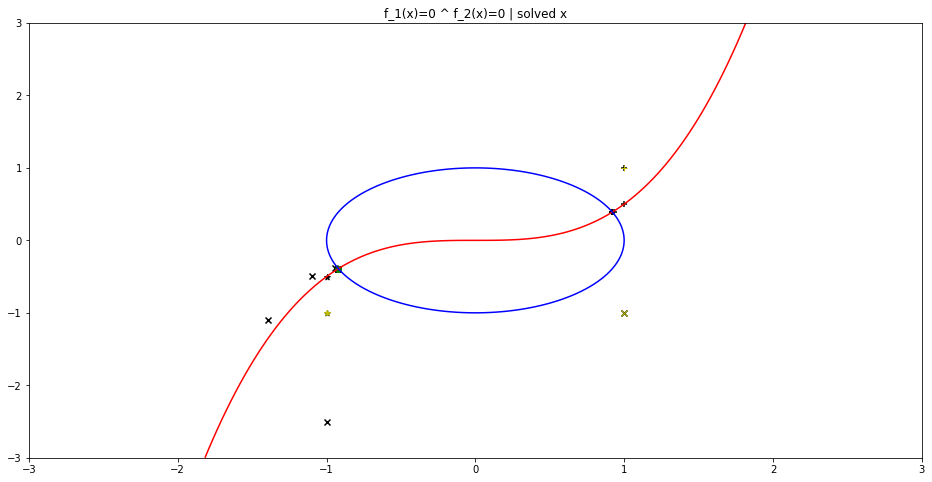

In [17]:
import matplotlib.pyplot as plt
import numpy as np

xmin, xmax, ymin, ymax = -3, 3, -3, 3
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax, 200)
xmesh, ymesh = np.meshgrid(x, y)
z1 = f1(xmesh, ymesh)
z2 = f2(xmesh, ymesh)
ax.contour(xmesh, ymesh, z1, colors="r", levels=[0]) # f_1(x)=0
ax.contour(xmesh, ymesh, z2, colors="b", levels=[0]) # f_2(x)=0

solver = Newton(f, df)
initials = [np.array([1,1]),
           np.array([-1,-1]),
           np.array([1,-1])]

markers = ["+", "*", "x"]

sols = []
for x0, m in zip(initials, markers):
    sol = solver.solve(x0)
    ax.scatter(solver.path_[:, 0], solver.path_[:, 1], color="k", marker=m)
    sols.append(sol)
    print(sol)
    
# 初期値
for init_x, m in zip(initials, markers):
    ax.plot(init_x[0], init_x[1], color="y", marker=m)
    

# 数値計算解
ax.scatter(sols[-1][0], sols[-1][1], color="g")

ax.set_title("f_1(x)=0 ^ f_2(x)=0 | solved x")


plt.show()

### 最適化のためのニュートン法

導関数$f^{'}(\boldsymbol{x})=0$を解いて、関数$f(\boldsymbol{x})$の最適値に対応する$\boldsymbol{x}$を求めるために利用する

だだし、一般に関数$f(\boldsymbol{x})$は凸関数とは限らないので、テーラー展開をして2次の項までを利用した2次近似曲線に対して、極値を求めることになる.

最適値計算のためのニュートン法には,関数$f(\boldsymbol{x})$の2次微分であるヘッセ行列$H(\boldsymbol{x})$の計算が必要になる

$$
\begin{align}
    f_{II}(\boldsymbol{x}) &= f(\bar{\boldsymbol{x}}) + \sum_{i=1}^{n}\frac{\partial{\bar{f}}}{\partial{x_i}}(x_i - \bar{x_i}) + \frac{1}{2}\sum_{i,j=1}^{n}\frac{\partial^{2}{\bar{f}}}{\partial{x_i}\partial{x_j}}(x_i - \bar{x_i})(x_j - \bar{x_j}) \\
    &= f(\bar{\boldsymbol{x}}) + \nabla{\bar{f}}(\boldsymbol{x} - \bar{\boldsymbol{x}}) + \frac{1}{2}(\boldsymbol{x} - \bar{\boldsymbol{x}})\bar{H}(\boldsymbol{x} - \bar{\boldsymbol{x}})
\end{align}
$$

変数$x_i$について、偏微分すると
$$
    \frac{\partial{\bar{f}}}{\partial{x_i}} + \sum_{j=1}^{n}\frac{\partial^{2}{\bar{f}}}{\partial{x_i}\partial{x_j}}(x_i - \bar{x_i}) = 0
$$

変数$\boldsymbol{x}=(x_1, x_2,\cdots, x_n)$について縦ベクトルとして並べると
$$
\bar{H}(\boldsymbol{x} - \bar{\boldsymbol{x}}) = - \nabla \bar{f}
$$

ヘッセ行列
$$
\begin{align}
    H(\boldsymbol{x}) &= \nabla f^{'}(\boldsymbol{x}) \\
    &= \nabla
    \begin{pmatrix}
        \frac{\partial{f}}{\partial{x_1}} \\
        \vdots \\
        \frac{\partial{f}}{\partial{x_n}} \\
    \end{pmatrix} \\
    &= \begin{pmatrix}
            \frac{\partial^{2}{f}}{\partial{x_1}^{2}} & \ldots & \frac{\partial^{2}{f}}{\partial{x_1}{x_n}} \\
            \vdots & \ddots & \vdots \\
            \frac{\partial^{2}{f}}{\partial{x_n}{x_1}} & \ldots & \frac{\partial^{2}{f}}{\partial{x_n}^{2}} \\
    \end{pmatrix}
\end{align}
$$

更新式
$$
    \boldsymbol{x}_{k+1} = \boldsymbol{x}_{k} - H(\boldsymbol{x})^{-1} \nabla f(\boldsymbol{x})
$$

ただし、ニュートン法は、ヘッセ行列が計算できて$H(\bar{\boldsymbol{x}})$が正則である必要がある

In [19]:
import scipy as sp

class Newton2:
    
    def __init__(self, df, H, eps=1e-10, max_iter=1000):
        
        # 1次微分:勾配ベクトル(関数)
        self.df = df
        # 2次微分:ヘッセ行列(関数)
        self.H = H
        
        self.eps = eps
        self.max_iter = max_iter
        self.path = None
        
    def solve(self, init_x):
        x = init_x
        iter = 0
        self.path = init_x.reshape(1, -1)
        
        while True:
            try:
                # ヘッセ行列の正則性チェック
                determinant = np.linalg.det(self.H(x))
                if determinant == 0:
                    raise ValueError("Hesse matrix is irregular matrix.")
                    
                # 逆行列を直接求めて、更新式で更新
                #x_new = x - linalg.inv(self.H(x)) @ self.df(x)
                
                # 更新式は連立1次方程式の解を使って行うほうが高速かつ安定
                #hesse_mat = self.H(x)
                #grad = self.df(x)
                #x_delta = np.linalg.solve(hesse_mat, -grad) # 連立1次方程式の解
                #x_new = x + x_delta
                
                # LU分解を使って連立1次方程式の解を求めるほうが、もっと高速かつ安定と思われ
                hesse_mat = self.H(x)
                grad = self.df(x)
                lu, p = sp.linalg.lu_factor(hesse_mat) # LU分解
                x_delta = sp.linalg.lu_solve((lu, p), -grad)
                x_new = x + x_delta
                
                # 更新値
                self.path = np.r_[self.path, x_new.reshape(1, -1)]
                
                # 収束条件
                if ((x - x_new) ** 2).sum() <= self.eps ** 2:
                    break
                    
                x = x_new
                    
                iter += 1
                if iter == self.max_iter:
                    break
                
            except ValueError as e:
                print(e.args[0])
                print("Terminate Newton method.")
                x_new = None
                break
            